In [1]:
import cv2 
import os
from matplotlib import pyplot as plt
import numpy as np
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Giving directory location
mainDirectory = "C:/Users/seyed/Music/Brain Tumor - Augmented/"

In [4]:
# Types of the dataset images and its directory name
imageCategories = ["Yes", "No"] 

In [5]:
# Creating list to store the images as np
with_Tumor_Data = []
with_No_Tumor_Data = []

In [6]:
# Storing the images into a list
for classes in imageCategories:
    pathDirectory = os.path.join(mainDirectory, classes)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       if classes == "Yes":
         with_Tumor_Data.append(image_array)
       elif classes == "No":
         with_No_Tumor_Data.append(image_array)


In [7]:
# Converting the lists into numpy arrays for tumour types
with_Tumor_Data = np.array(with_Tumor_Data)
with_No_Tumor_Data = np.array(with_No_Tumor_Data)

In [8]:
#Checking for number of images in both list
with_Tumor_Data.shape

(33390, 256, 256, 3)

In [9]:
with_No_Tumor_Data.shape

(17990, 256, 256, 3)

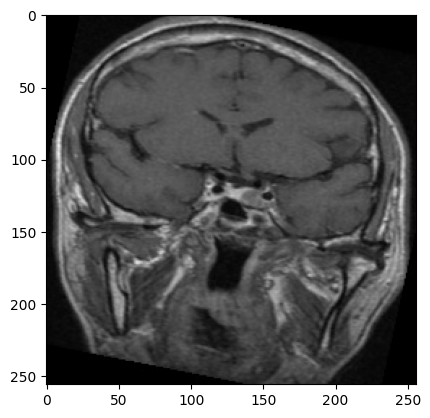

In [10]:
# Randomly checking for an image if the image is added to the list
plt.imshow(with_Tumor_Data[32492])

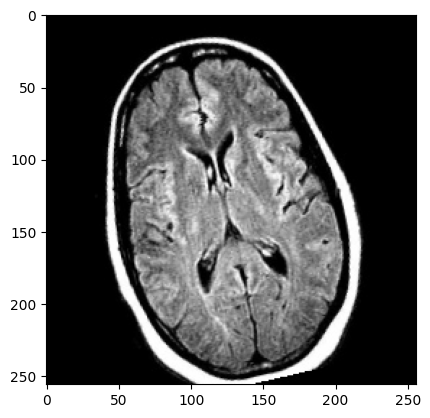

In [11]:
plt.imshow(with_No_Tumor_Data[16999])

In [12]:
# Defining the gamma value
gamma = 1.5

# Function to apply gamma correction
def applyGammaCorrection(images, gamma):
    for index in range(0, len(images)):
          # Normalize pixel values to the range [0, 1]
          normalized_image = images[index] / 255.0
    
          # Apply gamma correction
          corrected_image = np.power(normalized_image, gamma)
    
          # Denormalize the image to the original range [0, 255]
          corrected_image = (corrected_image * 255).astype(np.uint8)
    
          images[index] = corrected_image
      

# Apply gamma correction to gliomaData
applyGammaCorrection(with_Tumor_Data, gamma)
applyGammaCorrection(with_No_Tumor_Data, gamma)

In [13]:
# Checking if all the images has been added with gamma value
with_Tumor_Data.shape

(33390, 256, 256, 3)

In [14]:
with_No_Tumor_Data.shape

(17990, 256, 256, 3)

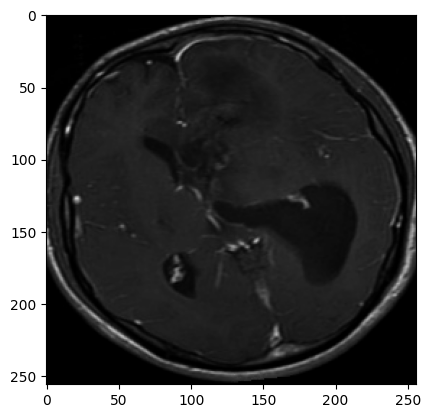

In [15]:
# Checking for an image if the image is applied with the gamma 
plt.imshow(with_Tumor_Data[33389])

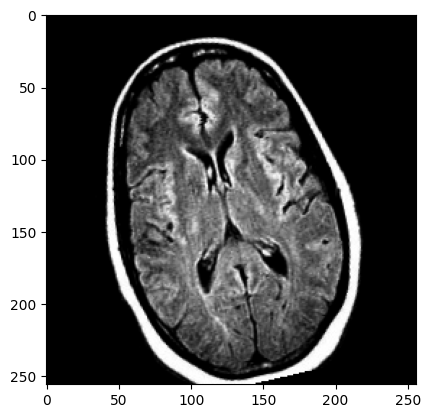

In [16]:
plt.imshow(with_No_Tumor_Data[16999])

In [17]:
# Deleting memory dump and cache in order to avoid memory issues
gc.collect()

60

In [18]:
# Types of the image dataset and its directory name
imageCategories = ["Yes", "No"]

# Combine image data and labels
allImages = np.concatenate([with_Tumor_Data, with_No_Tumor_Data], axis=0)

# Create corresponding labels based on the class names
allLabels = np.concatenate([
    np.full(len(with_Tumor_Data), "Yes"),       # Label for images wiith Tumor
    np.full(len(with_No_Tumor_Data), "No"),     # Label for images without Tumor
], axis=0)

In [19]:
allImages.shape

(51380, 256, 256, 3)

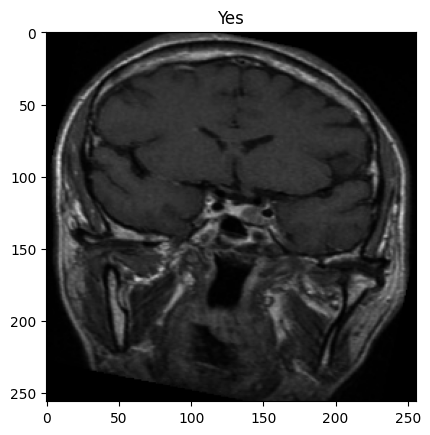

In [20]:
# Checking if all the images are properly labelled
plt.imshow(allImages[32492])
plt.title(allLabels[32492])
plt.show()

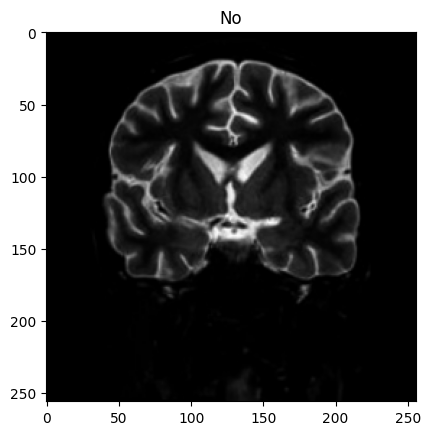

In [21]:
plt.imshow(allImages[51379])
plt.title(allLabels[51379])
plt.show()

In [22]:
# Spliting the dataset for train and test.
train_x, test_x, train_y, test_y = train_test_split(allImages, allLabels, test_size=0.2, random_state=4) 

In [23]:
# Checking the number of images for test and train image dataset split
train_x.shape

(41104, 256, 256, 3)

In [24]:
train_y.shape

(41104,)

In [25]:
test_x.shape

(10276, 256, 256, 3)

In [26]:
test_y.shape

(10276,)

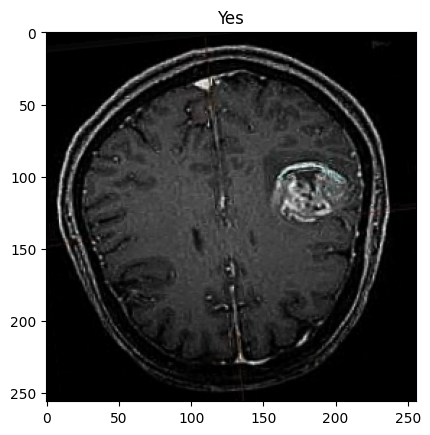

In [27]:
# Checking if the image is shuffled for the previous plotted image above
plt.imshow(train_x[3592])
plt.title(train_y[3592])
plt.show()

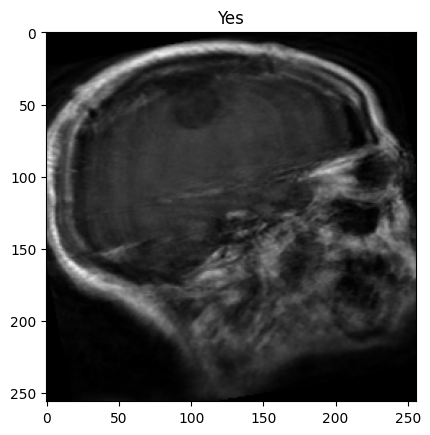

In [28]:
plt.imshow(test_x[10275])
plt.title(test_y[10275])
plt.show()

In [30]:
# Assuming train_y and test_y are your original labels, and train_x and test_x are your image data

# Use fit_transform on the training set labels
labelEncoder = LabelEncoder()
train_y_encoded = labelEncoder.fit_transform(train_y)

# Use transform on the test set labels
test_y_encoded = labelEncoder.transform(test_y)

# Main directory to store training and testing data
saveModelDataDirectory = "C:/Users/seyed/Music/Brain Tumor - ModelData/"

# Making two directories for both training and testing data sets
trainDirectory = os.path.join(saveModelDataDirectory, 'Train')
testDirectory = os.path.join(saveModelDataDirectory, 'Test')

# Categories of image classification
imageCategories = ["No", "Yes"]

# Creating the subdirectories by checking whether they already exist
for category in imageCategories:
    os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
    os.makedirs(os.path.join(testDirectory, category), exist_ok=True)

# Save training images
for i in range(len(train_x)):
    category = imageCategories[int(train_y_encoded[i])]  # Use original labels here
    filename = f"{category}_train_{i}.jpg"
    filepath = os.path.join(trainDirectory, category, filename)
    cv2.imwrite(filepath, np.uint8(train_x[i]))

# Save testing images
for i in range(len(test_x)):
    category = imageCategories[int(test_y_encoded[i])]  # Use original labels here
    filename = f"{category}_test_{i}.jpg"
    filepath = os.path.join(testDirectory, category, filename)
    cv2.imwrite(filepath, np.uint8(test_x[i]))

# Perform garbage collection to free up memory
gc.collect()


6656